In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [2]:
data = pd.read_excel('file.xls')
data.head()

,ID,EMAIL,email,label
0,1,1email@gmail.com,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,2,2email@gmail.com,martin a posted tassos papadopoulos the greek ...,0
2,3,3email@gmail.com,man threatens explosion in moscow thursday aug...,0
3,4,4email@gmail.com,klez the virus that won t die already the most...,0
4,5,5email@gmail.com,in adding cream to spaghetti carbonara which ...,0


In [3]:
data.drop(['ID','EMAIL'],axis=1, inplace=True)

In [4]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
ham_words = ''
spam_words = ''
# Creating a corpus of spam messages
for val in data[data['label'] == 1].email:
    text = str(val).lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words.strip() + ' '


# Creating a corpus of ham messages
for val in data[data['label'] == 0].email:
    text = str(val).lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words.strip() + ' '

In [6]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

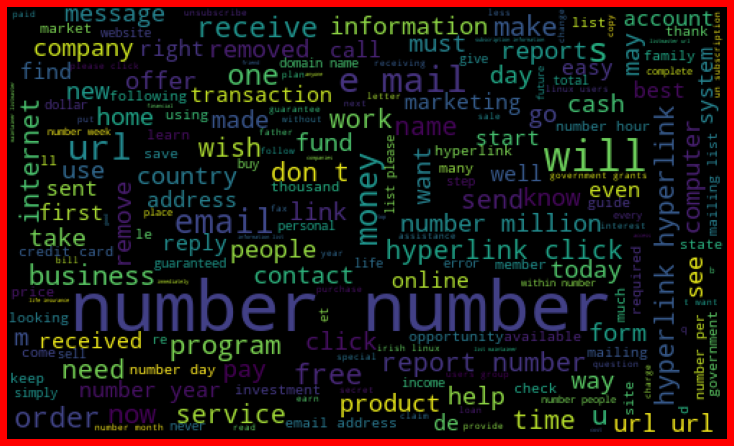

In [7]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='r')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

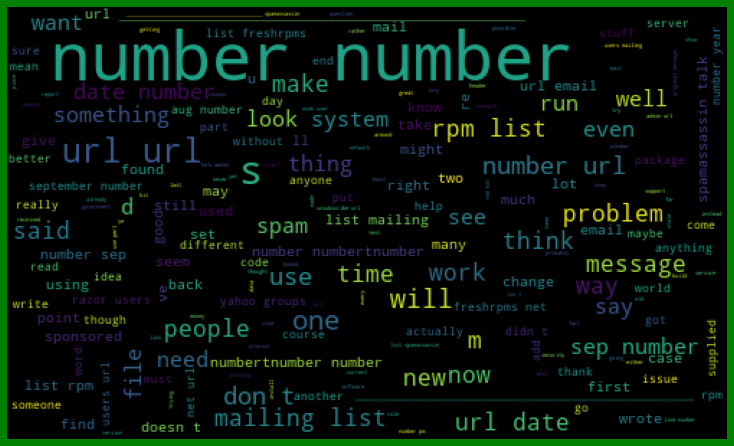

In [8]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [9]:
import nltk
nltk.download('stopwords')

#remove the punctuations and stopwords
import string
def text_process(text):
    text=str(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

data['email'] = data['email'].apply(text_process)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...,0
1,martin posted tassos papadopoulos greek sculpt...,0
2,man threatens explosion moscow thursday august...,0
3,klez virus die already prolific virus ever kle...,0
4,adding cream spaghetti carbonara effect pasta ...,0


In [10]:
email = pd.DataFrame(data['email'])
label = pd.DataFrame(data['label'])

In [11]:
from collections import Counter

total_counts = Counter()
for i in range(len(email)):
    for word in email.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  28686


In [12]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])


['NUMBER', 'URL', 'list', 'get', 'one', 'time', 'like', 'email', 'use', 'would', 'people', 'free', 'new', 'mail', 'wrote', 'e', 'rpm', 'mailing', 'date', 'message', 'also', 'make', 'hyperlink', 'spamassassin', 'us', 'users', 'said', 'money', 'url', 'information', 'could', 'way', 'spam', 'even', 'work', 'please', 'think', 'first', 'know', 'want', 'exmh', 'may', 'world', 'see', 'linux', 'using', 'business', 'much', 'send', 'well', 'need', 'good', 'go', 'line', 'many', 'home', 'years', 'subject', 'right', 'net']


In [16]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['email'])
vectors.shape

(2968, 28835)

In [17]:
#features = word_vectors
features = vectors

In [18]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [19]:
#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [20]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [21]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [22]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [23]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [24]:
pred_scores_word_vectors

[('SVC', [0.9798206278026906]),
 ('KN', [0.9080717488789237]),
 ('NB', [0.9596412556053812]),
 ('DT', [0.968609865470852]),
 ('LR', [0.9506726457399103]),
 ('RF', [0.9775784753363229])]

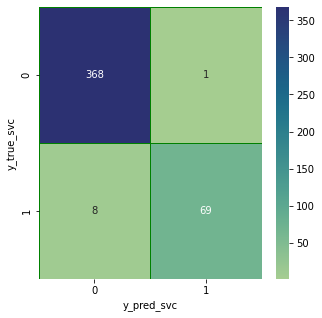

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# SVC
y_pred_svc = svc.predict(X_test)
y_true_svc = y_test
cm = confusion_matrix(y_true_svc, y_pred_svc)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,cmap="crest",linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svc")
plt.ylabel("y_true_svc")
plt.show()

In [26]:
 # Save the vectorizer
import joblib
vec_file = 'vectorizer.joblib'
joblib.dump(vectorizer, vec_file)
    
#save model

filename = "spam_classifier.joblib"
joblib.dump(svc, filename)

['spam_classifier.joblib']